In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Introduction to Networkx

The simple methods '.nodes()' and '.edges()' print the key components of the network.

In [4]:
HG = nx.house_graph() #is built in so good for demos (like preexisting graph)
HG.nodes()
HG.edges()

NodeView((0, 1, 2, 3, 4))

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

## Drawing the network

To draw the network, we need to give it a dictionary that maps each node to an X-Y coordinate. I give one below.

{0: Text(0, 0, '0'),
 1: Text(1, 0, '1'),
 2: Text(0, 1, '2'),
 3: Text(1, 1, '3'),
 4: Text(0.5, 2.0, '4')}

(-0.10500000000000001, 1.105, -0.21000000000000002, 2.21)

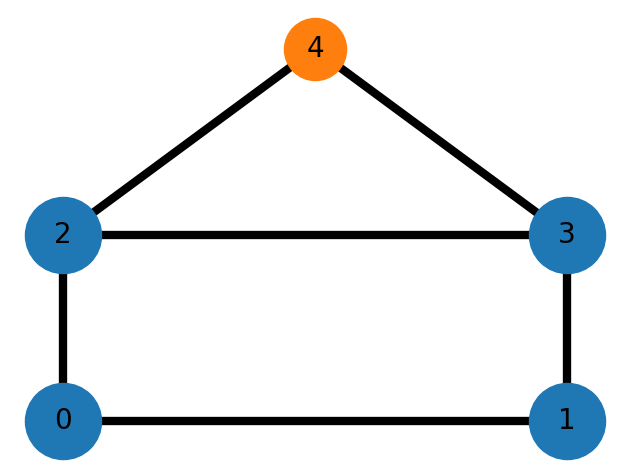

In [6]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)} #TO DRAW IT MUST FIRST MAP EACH NODE TO A XY COORDINATE IN A DICTIONARY

nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], 
    node_color="tab:blue"
)

nx.draw_networkx_nodes(HG, pos, node_size=2000, 
                       nodelist=[4], node_color="tab:orange")

nx.draw_networkx_edges(HG, pos, alpha=1, width=6) #so using HG which is the stored house_graph with nodes and edges and using the pos dictionary which ahs the coordinates
nx.draw_networkx_labels(HG, pos, font_size=20)
plt.tight_layout()
plt.axis("off")

In [8]:
#creating an adjacency matrix
ADJ = nx.to_pandas_adjacency(HG)
ADJ = ADJ.astype(bool) #make it a boolean bc this saves space

In [10]:
deg_0 = nx.degree(HG, 0) 
deg_0

2

# Activity
We will learn how to process a dataframe into a useable edgelist to feed into a graph.

In [12]:
import os
os.getcwd()

'/Users/ellascarola/Desktop/QSS20_S25/activities'

In [50]:
df = pd.read_pickle("../public_data/Raw_Tweets.pkl") # Load your tweets
df.head()
df.shape

,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid
12221,1221208309728006145,418859255,Sat Jan 25 23:08:44 +0000 2020,en,"RT @DepSecHargan: Every year in the US, 34,800...",retweeted_tweet_without_comment,638,1837,17778,[920035992073064450],9.200360e+17,1.221208e+18,NaN,NaN,NaN
28315,1221213073652043776,14499829,Sat Jan 25 23:27:40 +0000 2020,en,WHO’s risk assessment of the new #coronavirus ...,original,1743,5196950,46697,[],NaN,NaN,NaN,NaN,NaN
6092,1222281847163576321,1135486501,Tue Jan 28 22:14:35 +0000 2020,en,#FYI: 50 million are under travel restrictions...,original,950,27025,11145,[9624742],NaN,NaN,NaN,NaN,NaN
13618,1222289121118511104,117793973,Tue Jan 28 22:43:30 +0000 2020,en,What should I do if I have traveled to China a...,original,1236,5860,4578,[],NaN,NaN,NaN,NaN,NaN
19205,1222285279047843843,1465196934,Tue Jan 28 22:28:14 +0000 2020,en,Disease outbreaks can result in misinformation...,original,1946,3581,4636,[],NaN,NaN,NaN,NaN,NaN


(59887, 15)

### 1.1 Subset the dataframe to network data

- First, using .value_counts(), identify how many types of tweets there are, using the tweet_type column. 
- Then, filter out all tweets that are not "retweeted_tweet_without_comment" and "quoted_tweet."

In [52]:
# your code here
df.tweet_type.value_counts() #original, retweeted_tweet_without_comment, reply, quoted_tweet

df_filt = df[(df.tweet_type == "retweeted_tweet_without_comment") | (df.tweet_type == "quoted_tweet")]
df_filt.head()
df_filt.shape


tweet_type
original                           26275
retweeted_tweet_without_comment    19923
reply                               7292
quoted_tweet                        6397
Name: count, dtype: int64

,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid
12221,1221208309728006145,418859255,Sat Jan 25 23:08:44 +0000 2020,en,"RT @DepSecHargan: Every year in the US, 34,800...",retweeted_tweet_without_comment,638,1837,17778,[920035992073064450],9.200360e+17,1.221208e+18,NaN,NaN,NaN
25575,1222280171501256706,20467163,Tue Jan 28 22:07:56 +0000 2020,en,RT @RCCallihan: The declaration of a public he...,retweeted_tweet_without_comment,10261,30106,2762,"[1697808410, 146569971]",1.697808e+09,1.222247e+18,NaN,NaN,NaN
28489,1222283902724820995,426033838,Tue Jan 28 22:22:46 +0000 2020,en,RT @DepSecHargan: Start the #NewYear off right...,retweeted_tweet_without_comment,625,1823,22314,"[920035992073064450, 146569971]",9.200360e+17,1.222239e+18,NaN,NaN,NaN
28496,1222283757119590405,426033838,Tue Jan 28 22:22:11 +0000 2020,en,RT @CDCFlu: Elevated #flu activity is expected...,retweeted_tweet_without_comment,625,1823,22314,[16616061],1.661606e+07,1.222194e+18,NaN,NaN,NaN
12992,1220696703667326976,426033838,Fri Jan 24 13:15:48 +0000 2020,en,RT @CDCemergency: Is it a cold or flu? What’s ...,retweeted_tweet_without_comment,625,1822,22325,[19658936],1.965894e+07,1.220488e+18,NaN,NaN,NaN


(26320, 15)

In [54]:
## Run this. Why is it empty?
df[(df.tweet_type == "retweeted_tweet_without_comment") & (df.tweet_type == "quoted_tweet")]
## this is empty because it is looking for places where tweet type is equal to both of them which isn't possible

,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid


### 1.2 Create an edgelist

The "userid" column shows the person that did the retweeting. Create a new column called "userid2" that denotes the user retweeted. You will need to use the columns "rt_userid" and "qtd_userid."

In [56]:
## checking first
df_filt[["rt_userid", "qtd_userid"]].head(10)
df_filt[df_filt["rt_userid"].notna()]
df_filt[df_filt["qtd_userid"].notna()]

,rt_userid,qtd_userid
12221,9.200360e+17,NaN
25575,1.697808e+09,NaN
28489,9.200360e+17,NaN
28496,1.661606e+07,NaN
12992,1.965894e+07,NaN
12994,1.465700e+08,NaN
12996,2.399712e+08,NaN
26,1.465700e+08,NaN
7916,5.384568e+08,NaN
8990,1.465700e+08,NaN


,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid
12221,1221208309728006145,418859255,Sat Jan 25 23:08:44 +0000 2020,en,"RT @DepSecHargan: Every year in the US, 34,800...",retweeted_tweet_without_comment,638,1837,17778,[920035992073064450],9.200360e+17,1.221208e+18,NaN,NaN,NaN
25575,1222280171501256706,20467163,Tue Jan 28 22:07:56 +0000 2020,en,RT @RCCallihan: The declaration of a public he...,retweeted_tweet_without_comment,10261,30106,2762,"[1697808410, 146569971]",1.697808e+09,1.222247e+18,NaN,NaN,NaN
28489,1222283902724820995,426033838,Tue Jan 28 22:22:46 +0000 2020,en,RT @DepSecHargan: Start the #NewYear off right...,retweeted_tweet_without_comment,625,1823,22314,"[920035992073064450, 146569971]",9.200360e+17,1.222239e+18,NaN,NaN,NaN
28496,1222283757119590405,426033838,Tue Jan 28 22:22:11 +0000 2020,en,RT @CDCFlu: Elevated #flu activity is expected...,retweeted_tweet_without_comment,625,1823,22314,[16616061],1.661606e+07,1.222194e+18,NaN,NaN,NaN
12992,1220696703667326976,426033838,Fri Jan 24 13:15:48 +0000 2020,en,RT @CDCemergency: Is it a cold or flu? What’s ...,retweeted_tweet_without_comment,625,1822,22325,[19658936],1.965894e+07,1.220488e+18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178123,1311697178453254145,13218102,Thu Oct 01 15:59:12 +0000 2020,en,RT @TexasDSHS: Today is #TexasFluDay! A yearly...,retweeted_tweet_without_comment,12181,290055,40056,[68412042],6.841204e+07,1.311671e+18,NaN,NaN,NaN
71249,1320008044714098688,2987671552,Sat Oct 24 14:23:37 +0000 2020,en,"RT @MDHealthDept: Today, @MDHealthDept reports...",retweeted_tweet_without_comment,998,206890,9632,"[44961877, 44961877]",4.496188e+07,1.320005e+18,NaN,NaN,NaN
111383,1320011408311001090,2891165960,Sat Oct 24 14:36:59 +0000 2020,en,"RT @unmc: .@HHSGov Deputy Secretary, Eric D. H...",retweeted_tweet_without_comment,1212,32893,8014,"[16151917, 44783853]",1.615192e+07,1.320011e+18,NaN,NaN,NaN
159487,1320015440249225218,44783853,Sat Oct 24 14:53:00 +0000 2020,en,RT @CDCgov: Today is a good day to talk with y...,retweeted_tweet_without_comment,396,1013652,22511,[146569971],1.465700e+08,1.318949e+18,NaN,NaN,NaN


,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid
28043,1221912901495197698,21157904,Mon Jan 27 21:48:32 +0000 2020,en,The #2019nCoV outbreak is just one example of ...,quoted_tweet,900,168308,3923,[],NaN,NaN,146569971.0,What are the symptoms of 2019 Novel Coronaviru...,1.220829e+18
1904,1220073809644064771,258900199,Wed Jan 22 20:00:38 +0000 2020,en,These gun laws do not make us safer- they are ...,quoted_tweet,3303,47279,11875,[],NaN,NaN,759251.0,The suspected gunman in the Kansas City bar sh...,1.219819e+18
12071,1222215402454945797,131546062,Tue Jan 28 17:50:34 +0000 2020,en,Communist China has fought to keep #Taiwan out...,quoted_tweet,2810,307473,15688,[14499829],NaN,NaN,3108351.0,“I again urge the WHO not to exclude Taiwan ov...,1.219877e+18
20997,1222210142114066435,71652085,Tue Jan 28 17:29:40 +0000 2020,en,IDPH Director joined Chicago Tonight last nigh...,quoted_tweet,711,4269,6467,[],NaN,NaN,17602348.0,A @NorthwesternU professor is leading a team o...,1.222159e+18
24198,1222208213300469760,248735463,Tue Jan 28 17:22:00 +0000 2020,en,I'm closely monitoring developments about the ...,quoted_tweet,16237,261786,10716,[146569971],NaN,NaN,146569971.0,The immediate health risk from #2019nCoV in th...,1.221856e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168081,1316135595098492929,1071102246,Tue Oct 13 21:55:53 +0000 2020,en,Amazing job today by @SenWhitehouse. But it’s ...,quoted_tweet,926,37145,3855,"[242555999, 704320143824953344]",NaN,NaN,242555999.0,My colleagues said they supported a nominee be...,1.316067e+18
171833,1316135909067235330,231510077,Tue Oct 13 21:57:08 +0000 2020,en,RT @stellamchavez: Texas' @JoaquinCastrotx joi...,quoted_tweet,2519,233418,18239,"[42746303, 231510077, 39384517]",NaN,1.316134e+18,231510077.0,I joined @Ilhan and @RepRichmond in condemning...,1.316117e+18
4975,1311682674009026561,22523087,Thu Oct 01 15:01:34 +0000 2020,en,"Families desperately need food, stimulus check...",quoted_tweet,863,36428,4451,[],NaN,NaN,9300262.0,The USDA’s $4 billion Farmers to Families Food...,1.311663e+18
88454,1311689668837232640,13218102,Thu Oct 01 15:29:21 +0000 2020,en,Even if it slows down delivery of a vaccine to...,quoted_tweet,12181,290050,40055,[],NaN,NaN,21252618.0,PELOSI again reiterates she does NOT believe s...,1.311686e+18


In [64]:
df_filt["userid2"] = [
    rt if pd.notna(rt) else qtd
    for rt, qtd in zip(df_filt["rt_userid"], df_filt["qtd_userid"])
]


df_filt[df_filt["userid2"].notna()]
import numpy as np
df_filt["userid2"] = df_filt.userid2.fillna(0).astype(np.int64)
## the way he does it is fill each with 0s (.filna(0) and add it together-->since one will always be empty so just have 0s isntead of NaN
## also convert them to np.int64 bc scientific notation will lsoe the ohter values and can change them


/var/folders/06/5t48x2mx0lsc_1v4jxgdssjc0000gn/T/ipykernel_70588/2314121308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["userid2"] = [


,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid,userid2
12221,1221208309728006145,418859255,Sat Jan 25 23:08:44 +0000 2020,en,"RT @DepSecHargan: Every year in the US, 34,800...",retweeted_tweet_without_comment,638,1837,17778,[920035992073064450],9.200360e+17,1.221208e+18,NaN,NaN,NaN,9.200360e+17
25575,1222280171501256706,20467163,Tue Jan 28 22:07:56 +0000 2020,en,RT @RCCallihan: The declaration of a public he...,retweeted_tweet_without_comment,10261,30106,2762,"[1697808410, 146569971]",1.697808e+09,1.222247e+18,NaN,NaN,NaN,1.697808e+09
28489,1222283902724820995,426033838,Tue Jan 28 22:22:46 +0000 2020,en,RT @DepSecHargan: Start the #NewYear off right...,retweeted_tweet_without_comment,625,1823,22314,"[920035992073064450, 146569971]",9.200360e+17,1.222239e+18,NaN,NaN,NaN,9.200360e+17
28496,1222283757119590405,426033838,Tue Jan 28 22:22:11 +0000 2020,en,RT @CDCFlu: Elevated #flu activity is expected...,retweeted_tweet_without_comment,625,1823,22314,[16616061],1.661606e+07,1.222194e+18,NaN,NaN,NaN,1.661606e+07
12992,1220696703667326976,426033838,Fri Jan 24 13:15:48 +0000 2020,en,RT @CDCemergency: Is it a cold or flu? What’s ...,retweeted_tweet_without_comment,625,1822,22325,[19658936],1.965894e+07,1.220488e+18,NaN,NaN,NaN,1.965894e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178123,1311697178453254145,13218102,Thu Oct 01 15:59:12 +0000 2020,en,RT @TexasDSHS: Today is #TexasFluDay! A yearly...,retweeted_tweet_without_comment,12181,290055,40056,[68412042],6.841204e+07,1.311671e+18,NaN,NaN,NaN,6.841204e+07
71249,1320008044714098688,2987671552,Sat Oct 24 14:23:37 +0000 2020,en,"RT @MDHealthDept: Today, @MDHealthDept reports...",retweeted_tweet_without_comment,998,206890,9632,"[44961877, 44961877]",4.496188e+07,1.320005e+18,NaN,NaN,NaN,4.496188e+07
111383,1320011408311001090,2891165960,Sat Oct 24 14:36:59 +0000 2020,en,"RT @unmc: .@HHSGov Deputy Secretary, Eric D. H...",retweeted_tweet_without_comment,1212,32893,8014,"[16151917, 44783853]",1.615192e+07,1.320011e+18,NaN,NaN,NaN,1.615192e+07
159487,1320015440249225218,44783853,Sat Oct 24 14:53:00 +0000 2020,en,RT @CDCgov: Today is a good day to talk with y...,retweeted_tweet_without_comment,396,1013652,22511,[146569971],1.465700e+08,1.318949e+18,NaN,NaN,NaN,1.465700e+08


/var/folders/06/5t48x2mx0lsc_1v4jxgdssjc0000gn/T/ipykernel_70588/2314121308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["userid2"] = df_filt.userid2.fillna(0).astype(np.int64)


### 1.3 Sentiment scoring. 
- Now, use SentimentIntensityAnalyzer to label the sentiment of the text, in a new column called "weight." 
- The subset the dataframe to only have "userid", "user2", and "weight". 
- Rename "userid" to "user1", then group by "user1" and "user2", to find the mean sentiment (mean weight).

You now have your first edgelist!

In [66]:
import nltk
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df_filt["weight"] = df_filt["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ellascarola/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

/var/folders/06/5t48x2mx0lsc_1v4jxgdssjc0000gn/T/ipykernel_70588/357053230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["weight"] = df_filt["text"].apply(lambda x: sia.polarity_scores(x)["compound"])


In [67]:
df_sent_sub = df_filt[["userid", "userid2", "weight"]]
df_sent_sub = df_sent_sub.rename(columns = {"userid": "user1", "userid2":"user2"})

In [70]:
df_sent_sub.groupby(["user1", "user2"])["weight"].mean()

user1                user2              
5558312              5558312                0.7263
                     20093858               0.6705
                     20562924               0.5106
                     28743031               0.5106
                     50907797               0.8831
                                             ...  
815952318487298048   1008376462506971136    0.4404
                     1080865917377097728   -0.4019
1075205691621720064  3382591954             0.0000
                     1075205691621720064    0.7717
                     1083125649609506816    0.0000
Name: weight, Length: 9370, dtype: float64

# Netwulf Visualization
#### If you don't have the module, pip install netwulf
#### https://netwulf.readthedocs.io/en/latest/about.html

In [117]:
EL =  pd.read_pickle("../public_data/edge_list_final2.pkl")

In [119]:
EL[["user1","user2"]].values

array([[ 426033838,  146569971],
       [ 418859255,  146569971],
       [ 418859255,  146569971],
       ...,
       [2953974395,    5558312],
       [2953974395, 1209417007],
       [  18023868,   23711785]])

In [121]:
G = nx.Graph() # Creates a graph object
G.add_edges_from( EL[["user1","user2"]].values ) # Adds edges (and hence nodes from the edgelist)

# Creates the biggest subgraph
CC_nodes = list( nx.connected_components(G) )[0] # Generates a list of connected components, extracts the largest
GG = nx.subgraph(G, CC_nodes) # Creates the subgraph of the largest CC

In [82]:
len(GG)

458

In [123]:
from netwulf import visualize
import netwulf as nw

## this is the first library that allows you to itneractively view networks

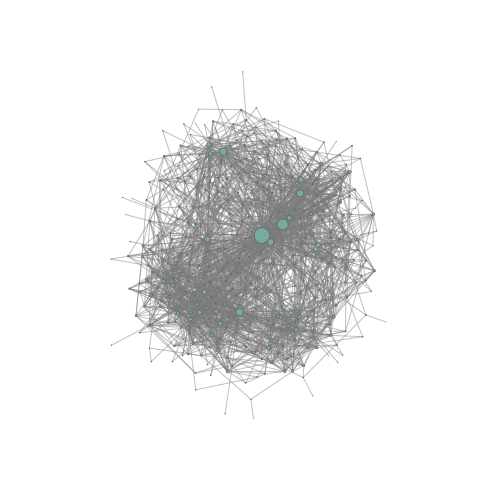

In [125]:
stylized_network, config = visualize(GG,)

In [101]:
U = pd.read_pickle("../public_data/UserInfo.pkl")
id2color = dict(zip(U.userid.values, U.PlotColor.values))
for k, v in GG.nodes(data=True):
    v["group"] = id2color[k]

U

,userid,PlotColor,User_type
0,1079770852302950016,grey,Independent
1,172858784,royalblue,Democrat
2,48117116,firebrick,Republican
3,129259273,firebrick,Republican
4,1249982359,firebrick,Republican
...,...,...,...
659,188369254,gold,Health Official
660,59545968,gold,Health Official
661,2353731720,gold,Health Official
662,293028988,gold,Health Official


In [107]:
#[n["group"] for n in GG.nodes(data=True)]

TypeError: tuple indices must be integers or slices, not str

In [109]:
GG.nodes()[426033838] #to see the dictionary-->every node is represented by it bc you gave them colros

{'group': 'gold'}

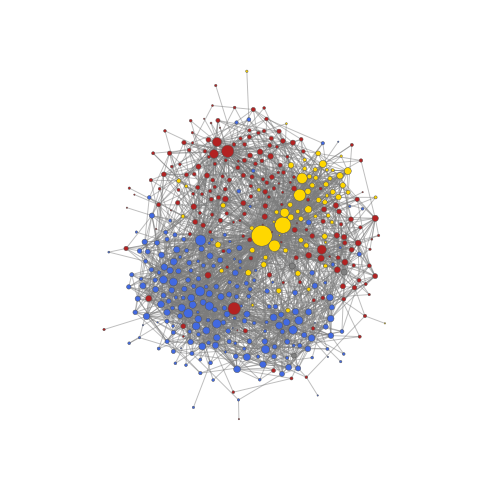

In [111]:
stylized_network, config = visualize(GG,port=2000) #post it into your notebook by checking the box in the other tab

### Activity Two
- Create a new column in U called "Degree," which denotes the degree of the node (userid). You will want to use G.degree()[n] where n is the userid.
- Group by User Type. Which group was the most popular during the pandemic?

In [171]:
# your code here.
U["Degree"] = U["userid"].apply(lambda x: GG.degree(x) if x in GG else 0)

U

,userid,PlotColor,User_type,Degree
0,1079770852302950016,grey,Independent,0
1,172858784,royalblue,Democrat,5
2,48117116,firebrick,Republican,1
3,129259273,firebrick,Republican,0
4,1249982359,firebrick,Republican,80
...,...,...,...,...
659,188369254,gold,Health Official,9
660,59545968,gold,Health Official,18
661,2353731720,gold,Health Official,8
662,293028988,gold,Health Official,10


In [177]:
popular = U.groupby("User_type").mean("Degree").reset_index() #do mean not sum!!!!!
popular[["User_type", "Degree"]]

##however, he suggests not filling NaNs (so would have to turn it back like have 0s be NaNs bc storage stuff i think?)

,User_type,Degree
0,Democrat,12.276699
1,Health Official,18.397590
2,Independent,0.292683
3,Republican,8.071090


In [ ]:
## Health officials have the highest mean degree so most popular